<center><h1>Act Report</h></center>

## Ananlyzing and Visulaizing the cleaned data

In [1]:
import numpy as np
import pandas as pd
import requests
import re
import json
import matplotlib.pyplot as plt
from skimage import io
print("imported needed libraries")

imported needed libraries


In [2]:
# reading data from the file we saved
df = pd.read_csv("twitter_archive_master.csv", index_col=0)

In [3]:
# converting timstamp column to the proper data type
df.timestamp = pd.to_datetime(df.timestamp)

In [4]:
# setting the timestamp as the index in order to make the index meaningful
df.set_index("timestamp", inplace=True)

In [5]:
# showing basic statistics of the numerical columns
df.describe()

,tweet_id,rating_numerator,rating_denominator,prediction_accuracy,likes_counter,retweet_counter
count,1.516000e+03,1516.000000,1516.0,1516.000000,1516.000000,1516.000000
mean,7.430682e+17,11.019129,10.0,0.613284,8999.184697,3006.067942
std,6.871954e+16,2.421636,0.0,0.259728,12532.608750,5138.287926
min,6.660209e+17,2.000000,10.0,0.044333,0.000000,16.000000
25%,6.787723e+17,10.000000,10.0,0.389419,1878.750000,678.750000
50%,7.204025e+17,11.000000,10.0,0.612080,4227.500000,1510.500000
75%,7.989278e+17,12.000000,10.0,0.848809,11412.250000,3520.000000
max,8.921774e+17,75.000000,10.0,0.999956,132810.000000,79515.000000


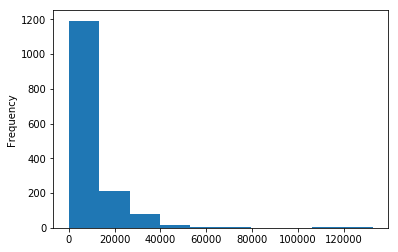

In [6]:
# showing the likes distribution
df.likes_counter.plot(kind="hist")

We can see that most likes ranges between 0 and 20000

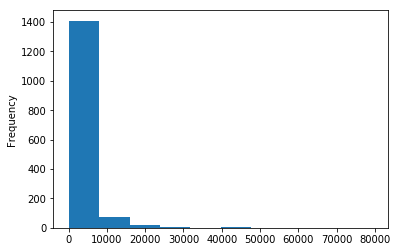

In [7]:
# showing the retweets number distribution
df.retweet_counter.plot(kind="hist")

We can see that most retweets ranges between 0 and 10000

In [8]:
# getting the dog that got the highest likes
most_liked_dog = df[df.likes_counter==df.likes_counter.max()]
print("Tweet: ",most_liked_dog.values[0][1])
print("Page rating: ",str(most_liked_dog.values[0][3]) + "/10")
print("Name: ",most_liked_dog.values[0][5])
print("Breed: ",most_liked_dog.values[0][7])
print("Likes: ",most_liked_dog.values[0][9])
print("Retweets: ",most_liked_dog.values[0][10])

Tweet:  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
Page rating:  13/10
Name:  nan
Breed:  Lakeland_terrier
Likes:  132810
Retweets:  48265


Text(0.5,1,'The most liked dog')

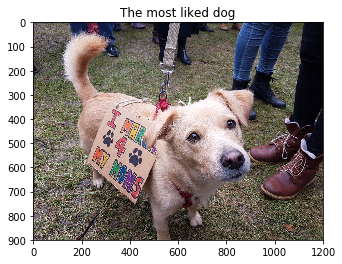

In [9]:
# showing the picture of the most liked dog
image = io.imread(most_liked_dog.values[0][6])
plt.imshow(image)
plt.title("The most liked dog")

The most liked dog was Lakeland_terrier breed with around 132810 likes with no name mentioned.

In [10]:
# getting the dog that got the highest retweets
most_retweeted_dog = df[df.retweet_counter==df.retweet_counter.max()]
print("Tweet: ",most_retweeted_dog.values[0][1])
print("Page rating: ",str(most_retweeted_dog.values[0][3]) + "/10")
print("Name: ",most_retweeted_dog.values[0][5])
print("Breed: ",most_retweeted_dog.values[0][7])
print("Likes: ",most_retweeted_dog.values[0][9])
print("Retweets: ",most_retweeted_dog.values[0][10])

Tweet:  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
Page rating:  13/10
Name:  nan
Breed:  Labrador_retriever
Likes:  131075
Retweets:  79515


Text(0.5,1,'The most retweeted dog')

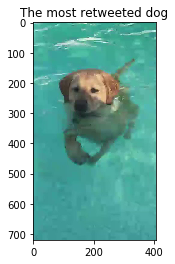

In [11]:
# showing the picture of the most retweeted dog
image = io.imread(most_retweeted_dog.values[0][6])
plt.imshow(image)
plt.title("The most retweeted dog")

The most retweeted dog was Labrador_retriever breed with around 79515 retweets and also the name is missing.

(array([ 735903.,  735964.,  736024.,  736085.,  736146.,  736208.,
         736269.,  736330.,  736389.,  736450.,  736511.,  736573.]),
 <a list of 12 Text xticklabel objects>)

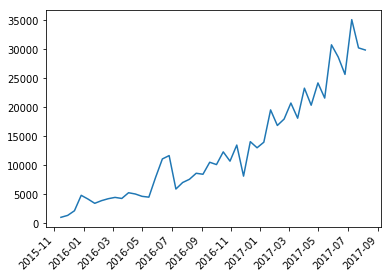

In [12]:
# showing the average likes rate of every two weeks over time
plt.plot(df.likes_counter.resample("2W").mean())
plt.xticks(rotation=45, ha='right')

We resampled our data for each two weeks and we measured the average of likes, we find that the number of likes is increasing over the time, which may indicate a growth in page followers or an increase in the activity of the page followers.

(array([ 735903.,  735964.,  736024.,  736085.,  736146.,  736208.,
         736269.,  736330.,  736389.,  736450.,  736511.,  736573.]),
 <a list of 12 Text xticklabel objects>)

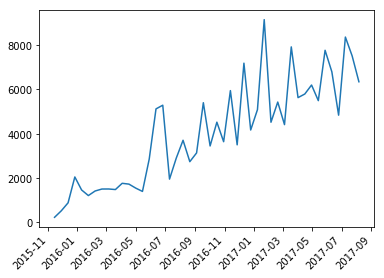

In [13]:
# showing the average retweet rate of every two weeks over time
plt.plot(df.retweet_counter.resample("2w").mean())
plt.xticks(rotation=45, ha='right')

We also resampled our data for each two weeks and we measured the average of retweet rate. We find that the number of retweets is increasing over the time, which may indicate a growth in page followers or an increase in the activity of the page followers.

Text(0.5,1,'Top 10 most common dog breeds')

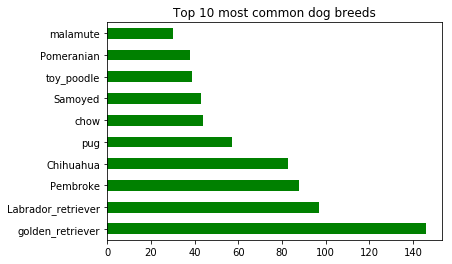

In [14]:
# showing the most common breeds in dogs
df["dog_prediction"].value_counts()[:10].plot(kind="barh", color='g')
plt.title("Top 10 most common dog breeds")

We also investigated the top 10 common breeds in dogs and we can notice that the most common breed is “Golden retriever” and the lowest is “Malamute”.

In [15]:
# showing the highest rated dog
highest_dog_page_rate= df[df["rating_numerator"]==df["rating_numerator"].max()]
print("Tweet: ",highest_dog_page_rate.values[0][1])
print("Page rating: ",str(highest_dog_page_rate.values[0][3]) + "/10")
print("Name: ",highest_dog_page_rate.values[0][5])
print("Breed: ",highest_dog_page_rate.values[0][7])
print("Likes: ",highest_dog_page_rate.values[0][9])
print("Retweets: ",highest_dog_page_rate.values[0][10])

Tweet:  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Page rating:  75/10
Name:  Logan
Breed:  Pomeranian
Likes:  20296
Retweets:  7069


We also investigate the highly rated dogs by the page using numerator as they have the same denominator, so we can use the numerator only, we can see that “Pomeranian” dog breed is the highest and the dog name is Logan.

In [16]:
# showing the lowest rated dog
lowest_dog_page_rate = df[df["rating_numerator"]==df["rating_numerator"].min()]
print("Tweet: ",lowest_dog_page_rate.values[0][1])
print("Page rating: ",str(lowest_dog_page_rate.values[0][3]) + "/10")
print("Name: ",lowest_dog_page_rate.values[0][5])
print("breed: ",lowest_dog_page_rate.values[0][7])
print("Likes: ",lowest_dog_page_rate.values[0][9])
print("Retweets: ",lowest_dog_page_rate.values[0][10])

Tweet:  This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz
Page rating:  2/10
Name:  Crystal
breed:  Maltese_dog
Likes:  5916
Retweets:  2880


We also investigate the lowest rated dogs by the page using numerator as they have the same denominator, so we can use the numerator only, we can see that “Maltese dog” breed is the lowest and the dog name is Crystal.

## Conclusion:
### Having looked at these insights, it may gives you an idea if you like dogs or recommendation about the most liked dogs. In addition, it may help you to know what are the common dogs in the market and it may be a simple advice, if you are looking for a dog to buy and want your dog to be cute.